In [1]:
# ライブラリのロード
import pandas as pd
from io import StringIO

## <font color='blue'>欠測値を持つサンプル/特徴量を取り除く</font>

In [2]:
# サンプルデータを作成
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
df = pd.read_csv(StringIO(csv_data))

In [4]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [5]:
# 各特徴量の欠損値をカウント
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [6]:
# 欠損値を含む行を削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# 欠損値を含む列を削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# すべての列がNaNである行だけを削除
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# 非NaN値が４つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# 特定の列（この場合は'C'）にNaNが含まれている行だけを削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## <font color='blue'>欠測値を補完する</font>

In [11]:
from sklearn.preprocessing import Imputer

In [12]:
# 欠測値補完のインスタンスを作成（平均値補完）
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [13]:
# データを適合
# fit : パラメータの取得
imr = imr.fit(df)

In [14]:
# 補完を実行
# transform : パラメータに基づいてデータを変換
imputed_data = imr.transform(df.values)

In [15]:
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

## <font color='blue'>カテゴリデータの処理</font>

In [16]:
import pandas as pd

In [17]:
# サンプルデータの生成（Tシャツの色・サイズ・価格・クラスラベル）
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])

In [18]:
df

,0,1,2,3
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [19]:
# 列名の設定
df.columns = ['color', 'size', 'price', 'classlabel']

In [20]:
# color : 名義特徴量
# size : 順序特徴量
# price : 数値特徴量
# classlabel : 名義特徴量
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## <font color='blue'>順序特徴量のマッピング</font>

In [21]:
# Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {'XL':3, 'L':2, 'M':1}

In [22]:
# Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping)

In [23]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## <font color='blue'>クラスラベルのエンコーディング</font>

In [24]:
import numpy as np

In [25]:
# クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [26]:
class_mapping

{'class1': 0, 'class2': 1}

In [27]:
# クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)

In [28]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [29]:
# 整数とクラスラベルを対応させるディクショナリを生成
inv_class_mapping = {v: k for k, v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [30]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [31]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [32]:
# sklearnのlabelEncorderを用いる
from sklearn.preprocessing import LabelEncoder

In [33]:
# ラベルエンコーダーのインスタンスを生成
class_le = LabelEncoder()

In [34]:
# クラスラベルから整数に変換
y = class_le.fit_transform(df['classlabel'].values)

In [35]:
y

array([0, 1, 0])

In [36]:
# クラスラベルを文字列に戻す
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## <font color='blue'>名義特徴量でのone-hotエンコーディング</font>

In [37]:
# Tシャツの色, サイズ, 価格を抽出
X = df[['color', 'size', 'price']].values

In [38]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [39]:
color_le = LabelEncoder()

In [40]:
X[:, 0] = color_le.fit_transform(X[:, 0])

In [41]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

<font color='red'>ここでこの配列を代入すると, green > blue, red > green > blueを判断し学習がちゃんと行えない可能性がある</font><br>
<font color='blue'>そこで, 名義特徴量のTシャツの色に対して, ダミー特徴量を作成する</font>

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
# one-hot　エンコーダの生成
ohe = OneHotEncoder(categorical_features=[0])

In [44]:
# one-hot エンコーディングを実行
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [45]:
# pandasを用いてone-hotエンコーディングを実行
# get_dummies関数は文字列を持つ列が, 学習アルゴリズムに適用できるように変換してくれる
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [46]:
# クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [47]:
# 名義特徴量をダミー変数に変換
pd.get_dummies(df[['price', 'color', 'size', 'classlabel']])

,price,size,classlabel,color_blue,color_green,color_red
0,10.1,1,0,0,1,0
1,13.5,2,1,0,0,1
2,15.3,3,0,1,0,0


In [48]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


## <font color='blue'>データセットの分割</font>

In [49]:
# Wineデータセットの読み込み
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [50]:
# 178行のワインサンプルと13個の特徴量
df_wine.shape

(178, 14)

In [51]:
# 列名を設定
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [52]:
# クラスラベルの表示
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [53]:
# wineデータセットの先頭５行を表示
df_wine.head(5)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
from sklearn.cross_validation import train_test_split
# 特徴量とクラスラベルを別々に分割
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

/Users/Takanori/Desktop/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
# トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<font color='red'>トレーニングデータとテストデータを分ける比率として最も使用されるのは, </font><font color='red'>60:40, 70:30, 80:20のいずれかである。</font><br>
<font color='red'>ただしデータセットが大きい場合は, </font><font color='red'>90:10, 99:1が用いられる。</font><br>

## <font color='blue'>特徴量の尺度を揃える</font>

In [56]:
# 正規化
# 最大, 最小で正規化
from sklearn.preprocessing import MinMaxScaler

In [57]:
# min-maxスケーリングのインスタンスを作成
mms = MinMaxScaler()

In [58]:
# トレーニングデータをスケーリング
x_train_norm = mms.fit_transform(X_train)
# テストデータをスケーリング
X_test_norm = mms.fit_transform(X_test)

In [59]:
# 標準化
# 平均値, S.D.で標準化
from sklearn.preprocessing import StandardScaler

In [60]:
# 標準化のインスタンスを作成
stdsc = StandardScaler()

In [61]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

## <font color='blue'>L1正則化</font>

In [62]:
from sklearn.linear_model import LogisticRegression
# L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
# L1正則化ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(penalty='l1', C=0.1)

In [64]:
# トレーニングデータに適合
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [66]:
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.981481481481


In [67]:
lr.intercept_

array([-0.38378908, -0.15806806, -0.7004275 ])

In [68]:
lr.coef_

array([[ 0.28004575,  0.        ,  0.        , -0.02796594,  0.        ,
         0.        ,  0.70995833,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23646367],
       [-0.64409268, -0.06867366, -0.05721283,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92662903,
         0.06027556,  0.        , -0.37102204],
       [ 0.        ,  0.06151524,  0.        ,  0.        ,  0.        ,
         0.        , -0.63604075,  0.        ,  0.        ,  0.49809912,
        -0.35818382, -0.57122104,  0.        ]])

In [69]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [70]:
from sklearn.cross_validation import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [72]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## <font color='blue'>逐次特徴選択アルゴリズム</font>

In [73]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring # 特徴量を評価する指標
        self.estimator = clone(estimator) # 推定器
        self.k_features = k_features # 選択する特徴量の個数
        self.test_size = test_size # テストデータの割合
        self.random_state = random_state # 乱数種を固定するrandom_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        # 全ての特徴量の個数, 列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        # 全ての特徴量を用いてスコアを算出
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        # スコアを格納
        self.scores_ = [score]
        
        # 指定した特徴量の個数になるまで処理を反復
        while dim > self.k_features:
            # 空のリストの生成（スコア, 列インデックス）
            scores = []
            subsets = []
            
            # 特徴量の部分集合を表す列インデックスの組み合わせごとに処理を反復
            for p in combinations(self.indices_, r=dim-1):
               
                # スコアを算出して格納
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                # 特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                
            # 最良のスコアのインデックスを抽出
            best = np.argmax(scores)
            # 最良のスコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            # 特徴量の個数を１つだけ減らして次のステップへ
            dim -= 1
            # print(len(scores))
            # スコアを格納
            self.scores_.append(scores[best])
            
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        # 抽出した特徴量を返す
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 指定された列番号indicesの特徴量を抽出してモデルに適合
        self.estimator.fit(X_train[:, indices], y_train)
        # テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:, indices])
        # 真のクラスラベルと予測値を用いてスコアを算出
        score = self.scoring(y_test, y_pred)
        return score

In [75]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [76]:
# k近傍分類器のインスタンスを生成（近傍点=2）
knn = KNeighborsClassifier(n_neighbors=2)
# 逐次後退選択のインスタンスを生成（特徴量の個数が1になるまで特徴量を選択）        
sbs = SBS(knn, k_features=1)        
# 逐次後退選択を実行
sbs.fit(X_train_std, y_train)

In [77]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 8, 10, 12),
 (0, 1, 2, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 10, 12),
 (0, 1, 3, 10, 12),
 (0, 1, 10, 12),
 (0, 1, 10),
 (0, 10),
 (0,)]

<font color='red'>ここで, SBSのfitメソッドはテスト（検証）用とトレーニンング用に新しいトレーニングサブセットを作成した。</font><br>
<font color='red'>これは, テスト用のデータがトレーニングデータの一部になることを防ぐためである。</font>

In [78]:
k_feat = [len(k) for k in sbs.subsets_]
k_feat

[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [79]:
sbs.scores_

[0.93548387096774188,
 0.967741935483871,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.93548387096774188,
 0.967741935483871,
 0.87096774193548387,
 0.83870967741935487]

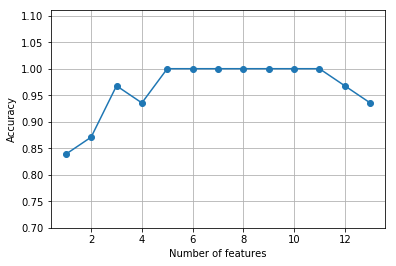

In [80]:
# 近傍点の個数のリスト（13, 12, ... , 1）
k_feat = [len(k) for k in sbs.subsets_]
# 横軸を近傍点の個数, 縦軸をスコアとした折れ線プロット
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.11])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [81]:
k5 = list(sbs.subsets_[8])
k5

[0, 1, 3, 10, 12]

<font color='red'>以上のグラフから分かるように, 特徴量の個数を減らしたため, 検証データセットに対するKNN分類器の正解率が改善されている。</font><br>
<font color='red'>また, k = {5, 6, 7, 8, 9, 10, 11}に対して分類器が100%の正解率を達成している。</font>

In [82]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


<font color='red'>上記の特徴量が認識率100%に達していることがわかる。</font>

In [83]:
# 13個全ての特徴量を用いてモデルに適合
knn.fit(X_train_std, y_train)
# トレーニングの正解率を出力
print('Training accuracy:', knn.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [84]:
# テストの正解率を出力
print('Test accuracy:', knn.score(X_test_std, y_test))

Test accuracy: 0.944444444444


<font color='red'>全ての特徴量を用いた場合, トレーニングデータに対して, 98%の正解率を出した</font><br>
<font color='red'>だが, 学習データに対して, 94%と過学習の傾向が見られる。</font>

In [85]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


<font color='red'>SBSアルゴリズムの簡単な説明</font><br>
<font color='red'>簡単に述べると, 各次元数の特徴量の集合で, 最も良い性能を算出する特徴量の集合を抜き出してくるということ</font><br>

## <font color='blue'>ランダムフォレストで特徴量の重要度にアクセス</font>

In [86]:
# ライブラリのロード
from sklearn.ensemble import RandomForestClassifier

In [87]:
# Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]
feat_labels

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [88]:
# ランダムフォレストオブジェクトの生成
# （木の個数=10000, 全てのコアを用いて並列処理を実行）
forest =RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [89]:
# モデルに適合
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [90]:
# 特徴量の重要度を抽出
importances = forest.feature_importances_
importances

array([ 0.10658906,  0.02539968,  0.01391619,  0.03203319,  0.02207807,
        0.0607176 ,  0.15094795,  0.01464516,  0.02235112,  0.18248262,
        0.07824279,  0.1319868 ,  0.15860977])

In [91]:
# 重要度の降順で特徴量のインデックスを抽出
indices = np.argsort(importances)[::-1]
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2])

In [92]:
# 特徴量の重要度で並び替え
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


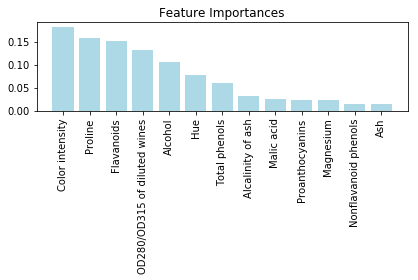

In [93]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

<font color='red'>上記の結果から一番重要な特徴量は, ワインの色の強さということがわかる</font><br>

<font color='red'>0.15以上の重要な特徴量を抜き出してくる</font>

In [94]:
x_selected = forest.transform(X_train, threshold=0.15)

/Users/Takanori/Desktop/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [95]:
x_selected.shape

(124, 3)

<font color='red'>ランダムフォレストで特徴量を選択する際に, ２つ以上の特徴量の相関が高い時, <br>１つの特徴量のランクが非常に高くなり, 残りの特徴量がランクに十分反映されないということがある。</font>